<a href="https://colab.research.google.com/github/mosesimbahale/machineLearning/blob/main/IBM_research_ATC_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IBM Research - Africa Technical Challenge 2022**

*Problem statement*

The public transportation demand prediction dataset comprises information about tickets purchased from Mobiticket for 14 routes from “up country” into Nairobi for 7 months. You’ll need a Zindi account to access the data and you can read more about the dataset from the challenge page. Your task is not to participate in the Zindi challenge but answer a series of questions below using the data from (train_revised.csv) file.

1. Find the top 7 most travelled routes for a Sunday on average, indicate the average of each and rank them in decreasing order
2. What is the probability that a passenger travelling from Kijauri will take a Shuttle if they depart before 07:30?
3. The Sequence ‘MK’ appears in a payment reference. Based on the distribution of characters in all the payment references what do you think is the most probable next character (if any)?




# Exploratory data analysis

**Importing libraries**

In [ ]:
import pandas as pd #Pandas provides functions to handle missing data, perform mathematical operations, and manipulate the data.
import numpy as np #NumPy supports n-dimensional arrays and provides numerical computing tools
import seaborn as sns #Understanding my variables
import datetime
from datetime import date

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=16)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=10)


**Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path ="/content/drive/MyDrive/Colab/dataset/train_revised.csv"
data = pd.read_csv(path)
#Dataset is now stored in a Pandas Dataframe

**Understanding the data**

In [ ]:
data.head() #eturns the first 5 rows of my dataset. This is useful if you want to see some example values for each variable

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Route,day
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,Migori-Nairobi,Tuesday
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,Migori-Nairobi,Sunday
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,Keroka-Nairobi,Sunday
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,Homa Bay-Nairobi,Monday
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,Migori-Nairobi,Monday


In [ ]:
data.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


In [ ]:
data.shape #Returns the number of rows by the number of columns for this dataset

(51645, 10)

In [ ]:
data.columns #Returns the name of all columns in the dataset

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
data.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


In [ ]:
#Checking for unique values
data.nunique(axis=0)
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


**Cleaning the data**

To check misssing values

In [ ]:
data.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [ ]:
#There are no missing values

**Relationship analysis**

In [ ]:
corelation = data.corr()

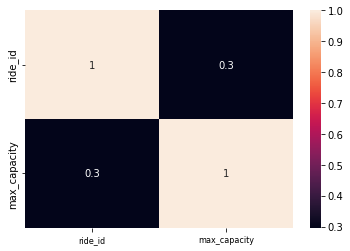

In [ ]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns
            ,annot=True)

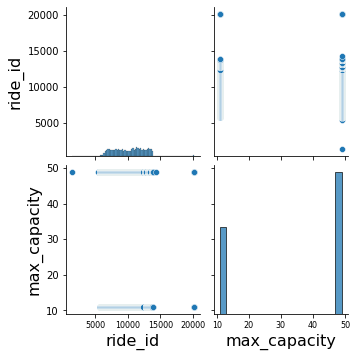

In [ ]:
sns.pairplot(data)

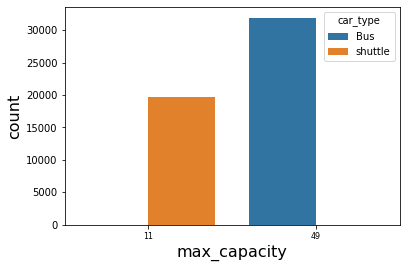

In [ ]:
sns.countplot(x='max_capacity',data=data,hue='car_type')

# Solution

1. **Find the top 7 most travelled routes for a Sunday on average, indicate the average of each and rank them in decreasing order**


**-Find the most travellled route**


**-Find most travlled by day**


**-order**





In [ ]:
#create Route column Route
data["Route"]= data["travel_from"]+"-" + data["travel_to"]

#convert traveldate from object to datetime datatype
data["travel_date" ] = pd.to_datetime(data["travel_date"])

#create day column
data["day" ]=data["travel_date"].dt.day_name()


# get Sunday's data 
Sunday = data[data["day"]=="Sunday"]


#sunday_awendo = Sunday[Sunday['Route']=="Awendo-Nairobi"]
#sunday_awendo.info()
#Count Route 
(Sunday.groupby(["Route","day"]).size()).sort_values(ascending= False)



Route              day   
Kisii-Nairobi      Sunday    2756
Migori-Nairobi     Sunday     973
Homa Bay-Nairobi   Sunday     910
Sirare-Nairobi     Sunday     629
Rongo-Nairobi      Sunday     538
Kehancha-Nairobi   Sunday     301
Awendo-Nairobi     Sunday     296
Kijauri-Nairobi    Sunday     115
Nyachenge-Nairobi  Sunday      85
Mbita-Nairobi      Sunday      83
Rodi-Nairobi       Sunday      63
Ndhiwa-Nairobi     Sunday      45
Keroka-Nairobi     Sunday      41
Sori-Nairobi       Sunday       9
Keumbu-Nairobi     Sunday       3
dtype: int64

In [ ]:
data["Route"].unique() # Two missing Routes on the results from the code above

array(['Migori-Nairobi', 'Keroka-Nairobi', 'Homa Bay-Nairobi',
       'Kisii-Nairobi', 'Keumbu-Nairobi', 'Rongo-Nairobi',
       'Kijauri-Nairobi', 'Oyugis-Nairobi', 'Awendo-Nairobi',
       'Sirare-Nairobi', 'Nyachenge-Nairobi', 'Kehancha-Nairobi',
       'Kendu Bay-Nairobi', 'Sori-Nairobi', 'Rodi-Nairobi',
       'Mbita-Nairobi', 'Ndhiwa-Nairobi'], dtype=object)

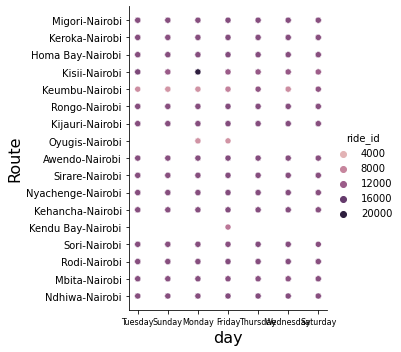

In [ ]:
sns.relplot(x= 'day', y='Route', hue = 'ride_id' ,data=data)
# Two Routes missing on Sunday Kendu Bay-Nairobi & Oyugis-Nairobi
# plot below Shows no cars travelling on both routes for sunday   

**Top 7 most travelled routes for a Sunday on average**

1. Kisii-Nairobi      Sunday    2756
2. Migori-Nairobi     Sunday     973
3. Homa Bay-Nairobi   Sunday     910
4. Sirare-Nairobi     Sunday     629
5. Rongo-Nairobi      Sunday     538
6. Kehancha-Nairobi   Sunday     301
7. Awendo-Nairobi     Sunday     296  





2. **What is the probability that a passenger travelling from Kijauri will take a shuttle if they depart before 07:30?**

In [ ]:
#Get Kijauri's Route data
Kijauri = data[data["Route"]=="Kijauri-Nairobi"] 



#Get data before 7:30
Kijauri_730 = Kijauri[Kijauri['travel_time']<="7:29"]
#Kijauri_730.info()

#Get data before 7:30 using shuttle
Kijauri_730_shuttle = Kijauri_730[Kijauri_730['car_type']=="shuttle"]
#Kijauri_730_shuttle.info()


#Get probability of shuttle
len(Kijauri_730_shuttle)/len(Kijauri_730)



0.5441340782122905

A probability of 0.5441340782122905

3. **The Sequence ‘MK’ appears in a payment reference. Based on the distribution of characters in all the payment references what do you think is the most probable next character (if any)?**

In [ ]:
#Get the payment reference data with MK
paymentRef = pd.Series(data["payment_receipt"]).str.contains('MK', case=True, flags=0, na=None, regex=True)

#paymentRef.describe()
#paymentRef.head()

#Count the number of payment receipts with MK
paymentRef.value_counts( normalize=False, sort=True, ascending=True, dropna=True)


True       499
False    51146
Name: payment_receipt, dtype: int64

In [ ]:
#Get most probable next character



# Tools


**Colab notebook** or "colaboratory" just like any other notebook, allows us to combine executable code and rich text in a single document.

**Reasons why I decided to use Colab**

*   Colab allows me to harness the full power of python libraries to analyze and visualize data with ease.

*   There is minimal amount of configuratrion required. 
*   Access to GPUs for free just incase. 
*   Ease of sharing this document.


**Python**  

**Reasons why I decided to use python**

*   Python provides libraries for graphics and data visualization to build plots.
*   It has a vast collection of libraries for numerical computation and data manipulation which comes in handy in this case.
*  Python programming language is scalable and flexible.






